<a href="https://colab.research.google.com/github/JimKing100/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install libgeos
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
     / 163.0MB 494kB/s
  Created wheel for basemap: filename=basemap-1.2.0-cp36-cp36m-linux_x86_64.whl size=121756029 sha256=ac9ae97d58b8e1faaea00dc26fff4573fe87f2d590639e53ad4ed0da0a0c680f
  Stored in directory: /tmp/pip-ephem-wheel-cache-3jkglz5r/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
# Install fiona
!pip install fiona

In [0]:
# Install geopy
!pip install geopy

In [0]:
# Import libraries
import pandas as pd
import numpy as np

from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

from descartes import PolygonPatch

from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

from itertools import chain
from geopy.geocoders import Nominatim
import fiona
import matplotlib.pyplot as plt

In [0]:
# Load SF real estate data
initial_data = pd.read_csv('https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/SF-SFR-Sales-Final1.csv')
print(initial_data.shape)
initial_data.head(20)

(23711, 30)


,longitude,latitude,full_address,city,state,street_no,street_name,street_nox,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_data,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,sf_source,sf_source_decs,sf,lot_acres,lot_sf,year_built,zoning
0,-122.466620,37.753273,"1878 10th Ave, San Francisco, CA 94122-4602",San Francisco,CA,1878,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,8/31/11,65,649000,12/22/11,580000,6,1.00,2,T,Per Tax Records,1480,NaN,0,1932,RH1
1,-122.466670,37.753850,"1842 10th Ave, San Francisco, CA 94122-4602",San Francisco,CA,1842,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,10/8/08,164,679000,3/23/09,509000,0,1.00,2,T,Per Tax Records,920,NaN,0,1908,RH1
2,-122.466700,37.754070,"1829 10th Ave, San Francisco, CA 94122",San Francisco,CA,1829,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,9/6/13,15,699000,10/11/13,840000,0,1.50,2,T,Per Tax Records,1200,0.0693,3017,1906,RH1
3,-122.466965,37.758057,"1612 10th Ave, San Francisco, CA 94122",San Francisco,CA,1612,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,6/8/10,9,699900,7/29/10,817000,6,1.00,3,T,Per Tax Records,1800,NaN,0,1914,NaN
4,-122.466910,37.757130,"1671 10th Ave, San Francisco, CA 94122",San Francisco,CA,1671,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,9/8/11,25,749000,10/6/11,785000,5,1.00,2,T,Per Tax Records,1050,NaN,0,1938,RH2
5,-122.468510,37.780070,"435 10th Ave, San Francisco, CA 94118",San Francisco,CA,435,10th,NaN,Ave,94118,1020,1,SF District 1,1020,1 - Inner Richmond,10/31/11,93,785000,2/28/12,725000,7,1.25,3,T,Per Tax Records,1658,NaN,0,1908,RH2
6,-122.466520,37.751568,"1969 10th Ave, San Francisco, CA 94116",San Francisco,CA,1969,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,3/4/10,47,788000,5/7/10,721000,7,1.00,2,T,Per Tax Records,1430,NaN,0,1936,NaN
7,-122.466410,37.750183,"2038 10th Ave, San Francisco, CA 94116",San Francisco,CA,2038,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,3/29/12,302,799000,3/15/13,800000,6,2.00,2,T,Per Tax Records,1853,NaN,0,1935,RH1
8,-122.466540,37.751793,"1955 10th Ave, San Francisco, CA 94116-1332",San Francisco,CA,1955,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,5/9/14,49,799000,8/20/14,830000,4,1.00,1,U,Not Available,0,NaN,0,0,RH1
9,-122.467190,37.761170,"1451 10th Ave, San Francisco, CA 94122-3602",San Francisco,CA,1451,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,8/26/10,22,799000,10/1/10,875000,5,1.50,2,T,Per Tax Records,1275,NaN,0,1908,NaN


In [0]:
# Rename subdistr_desc to neighborhood
temp_data = initial_data.rename(columns={'subdist_desc': 'neighborhood'})
temp_data.head()

,longitude,latitude,full_address,city,state,street_no,street_name,street_nox,street_suffix,zip,area,district_no,district_desc,subdist_no,neighborhood,on_market_data,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,sf_source,sf_source_decs,sf,lot_acres,lot_sf,year_built,zoning
0,-122.466620,37.753273,"1878 10th Ave, San Francisco, CA 94122-4602",San Francisco,CA,1878,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,8/31/11,65,649000,12/22/11,580000,6,1.0,2,T,Per Tax Records,1480,NaN,0,1932,RH1
1,-122.466670,37.753850,"1842 10th Ave, San Francisco, CA 94122-4602",San Francisco,CA,1842,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,10/8/08,164,679000,3/23/09,509000,0,1.0,2,T,Per Tax Records,920,NaN,0,1908,RH1
2,-122.466700,37.754070,"1829 10th Ave, San Francisco, CA 94122",San Francisco,CA,1829,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,9/6/13,15,699000,10/11/13,840000,0,1.5,2,T,Per Tax Records,1200,0.0693,3017,1906,RH1
3,-122.466965,37.758057,"1612 10th Ave, San Francisco, CA 94122",San Francisco,CA,1612,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,6/8/10,9,699900,7/29/10,817000,6,1.0,3,T,Per Tax Records,1800,NaN,0,1914,NaN
4,-122.466910,37.757130,"1671 10th Ave, San Francisco, CA 94122",San Francisco,CA,1671,10th,NaN,Ave,94122,2060,2,SF District 2,2060,2 - Inner Sunset,9/8/11,25,749000,10/6/11,785000,5,1.0,2,T,Per Tax Records,1050,NaN,0,1938,RH2


In [0]:
neighborhood_dict = {1010: '1a', 1020: '1b', 1030: '1c', 1040: '1d', 1050: '1e', 1060: '1f', 1070: '1g',
                     2010: '2a', 2020: '2b', 2030: '2c', 2040: '2d', 2050: '2e', 2060: '2f', 2070: '2g',
                     3010: '3a', 3020: '3b', 3030: '3c', 3040: '3d', 3050: '3e', 3060: '3f', 3070: '3g', 3080: '3h', 3090: '3j',
                     4010: '4a', 4020: '4b', 4030: '4c', 4040: '4d', 4050: '4e', 4060: '4f', 4070: '4g', 4080: '4h', 4090: '4j', 4100: '4k', 4110: '4m', 4120: '4n', 4130: '4p', 4140: '4r', 4150: '4s', 4160: '4t',
                     5010: '5a', 5020: '5b', 5030: '5c', 5040: '5d', 5050: '5e', 5060: '5f', 5070: '5g', 5080: '5h', 5090: '5j', 5100: '5k', 5110: '5m',
                     6010: '6a', 6020: '6b', 6030: '6c', 6040: '6d', 6050: '6e', 6060: '6f',
                     7010: '7a', 7020: '7b', 7030: '7c', 7040: '7d', 
                     8010: '8a',             8030: '8c', 8040: '8d', 8050: '8e', 8060: '8f', 8070: '8g', 8080: '8h', 8090: '8j',
                     9010: '9a', 9020: '9c', 9030: '9d', 9040: '9e', 9050: '9f', 9060: '9h', 9070: '9j', 9080: '9g', 
                     10010: '10a', 10020: '10b', 10030: '10c', 10040: '10d', 10050: '10e', 10060: '10f', 10070: '10g', 10080: '10h', 10090: '10j', 10100: '10k', 10110: '10m', 10120: '10n'
                    }
sf_data = temp_data.replace({"subdist_no": neighborhood_dict})
# Change the neighborhood to match the maps neighborhood 
# sf_data['neighborhood'] = sf_data['neighborhood'].str[4:]
sf_data.head() 

,longitude,latitude,full_address,city,state,street_no,street_name,street_nox,street_suffix,zip,area,district_no,district_desc,subdist_no,neighborhood,on_market_data,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,sf_source,sf_source_decs,sf,lot_acres,lot_sf,year_built,zoning
0,-122.466620,37.753273,"1878 10th Ave, San Francisco, CA 94122-4602",San Francisco,CA,1878,10th,NaN,Ave,94122,2060,2,SF District 2,2f,2 - Inner Sunset,8/31/11,65,649000,12/22/11,580000,6,1.0,2,T,Per Tax Records,1480,NaN,0,1932,RH1
1,-122.466670,37.753850,"1842 10th Ave, San Francisco, CA 94122-4602",San Francisco,CA,1842,10th,NaN,Ave,94122,2060,2,SF District 2,2f,2 - Inner Sunset,10/8/08,164,679000,3/23/09,509000,0,1.0,2,T,Per Tax Records,920,NaN,0,1908,RH1
2,-122.466700,37.754070,"1829 10th Ave, San Francisco, CA 94122",San Francisco,CA,1829,10th,NaN,Ave,94122,2060,2,SF District 2,2f,2 - Inner Sunset,9/6/13,15,699000,10/11/13,840000,0,1.5,2,T,Per Tax Records,1200,0.0693,3017,1906,RH1
3,-122.466965,37.758057,"1612 10th Ave, San Francisco, CA 94122",San Francisco,CA,1612,10th,NaN,Ave,94122,2060,2,SF District 2,2f,2 - Inner Sunset,6/8/10,9,699900,7/29/10,817000,6,1.0,3,T,Per Tax Records,1800,NaN,0,1914,NaN
4,-122.466910,37.757130,"1671 10th Ave, San Francisco, CA 94122",San Francisco,CA,1671,10th,NaN,Ave,94122,2060,2,SF District 2,2f,2 - Inner Sunset,9/8/11,25,749000,10/6/11,785000,5,1.0,2,T,Per Tax Records,1050,NaN,0,1938,RH2


In [0]:
neighborhood_data = pd.DataFrame({'price_sf': sf_data.groupby('subdist_no').apply(
                                   lambda x: sum(x['sale_price'])/sum(x['sf']))})
neighborhood_data.loc['8b'] = [1]
neighborhood_data.loc['8h'] = [1]
neighborhood_data.loc['9d'] = [1]
neighborhood_data.loc['12a'] = [1]
#neighborhood_data = neighborhood_data.append({'subdist_no': '8b', 'price_sf': 1}, ignore_index=True) #DfObj = dfObj.append({'Name' : 'Sahil' , 'Age' : 22} , ignore_index=True)
#neighborhood_data.loc['10a', 'price_sf']
neighborhood_data.sort_values(by=['subdist_no'])

,price_sf
subdist_no,
10a,415.417979
10b,522.064080
10c,586.687555
10d,530.954830
10e,452.118785
10f,545.447338
10g,510.475123
10h,630.432633
10j,273.087373


In [0]:
# Set 0 values in square foot (sf) to NaN
# sf_data['sf'].replace(0, np.nan, inplace=True)
# sf_data.head()

In [0]:
#for i in range(1000, 1400):
#  geolocator = Nominatim(user_agent='Test')
#  location = geolocator.geocode(sf_data.loc[i, 'full_address'], timeout=None)
#  if location:
#    sf_data.loc[i, 'latitude'] = location.latitude
#    sf_data.loc[i, 'longitude'] = location.longitude

In [0]:
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp?raw=true'
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.dbf?raw=true'
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.prj?raw=true'
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shx?raw=true'

--2019-08-04 19:45:50--  https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/JimKing100/SF_Real_Estate_Project/raw/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp [following]
--2019-08-04 19:45:50--  https://github.com/JimKing100/SF_Real_Estate_Project/raw/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp [following]
--2019-08-04 19:45:50--  https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/geo_export_965a7270-cc48-

In [0]:
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.dbf?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.dbf
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.prj?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.prj
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shx?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shx

In [0]:
shp = fiona.open('/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp')

In [0]:
# Extract map boundaries
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
# width, height of map
w, h = coords[2] - coords[0], coords[3] - coords[1]

In [0]:
m = Basemap(
    projection='tmerc',
    lon_0=-122.,
    lat_0=37.7,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

(92,
 5,
 [-122.51494807968153, 37.70808933741858, 0.0, 0.0],
 [-122.35696603928594, 37.811573987414484, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7f571b5b6ba8>)

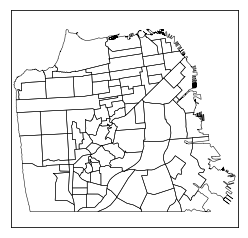

In [0]:
m.readshapefile(
    '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898',
    'SF',
    color='black',
    zorder=2)

In [0]:
# Change parks to 12a
m.SF_info[24]['nid'] = '12a'
m.SF_info[73]['nid'] = '12a'
m.SF_info[91]['nid'] = '12a'

In [0]:
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.SF],
    'nbrhood_name': [nbrhood['nbrhood'] for nbrhood in m.SF_info],
    'nid': [nid['nid'] for nid in m.SF_info],
    'price_sf': [neighborhood_data.loc[nid['nid'], 'price_sf'] for nid in m.SF_info]
})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
# Draw neighborhoods with polygons
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x,
    fc='#808080',
    ec='#ffffff', lw=.5, alpha=1,
    zorder=4))

df_map.head()

#print(df_map['nbrhood_name'].unique().tolist())
#print(sf_data['neighborhood'].unique().tolist())
#pd.set_option('max_rows', 100)

,poly,nbrhood_name,nid,price_sf,area_m,area_km,patches
0,"POLYGON ((7715.167703048319 8393.557469683687,...",Alamo Square,6e,809.780584,3.245940e+05,3.245940,"PathPatch16((7715.17, 8393.56) ...)"
1,"POLYGON ((6133.610085287233 8930.101370827508,...",Anza Vista,6a,683.228584,2.888324e+05,2.888324,"PathPatch10((6133.61, 8930.1) ...)"
2,"POLYGON ((4605.819118328618 3648.076924674302,...",Balboa Terrace,4a,719.214567,2.185278e+05,2.185278,"PathPatch23((4605.82, 3648.08) ...)"
3,"POLYGON ((11395.04759510169 5621.170830157842,...",Bayview,10a,415.417979,5.015361e+06,50.153607,"PathPatch562((11395, 5621.17) ...)"
4,"POLYGON ((9969.501990147706 5508.065990637874,...",Bernal Heights,9a,989.012567,2.827494e+06,28.274940,"PathPatch61((9969.5, 5508.07) ...)"


In [0]:
#Create Point objects in map coordinates from dataframe lon and lat values
map_points = pd.Series([Point(m(mapped_x,mapped_y)) for mapped_x, mapped_y in zip(sf_data['longitude'],sf_data['latitude'])])
plt_points = MultiPoint(list(map_points.values))
    

<Figure size 432x288 with 0 Axes>

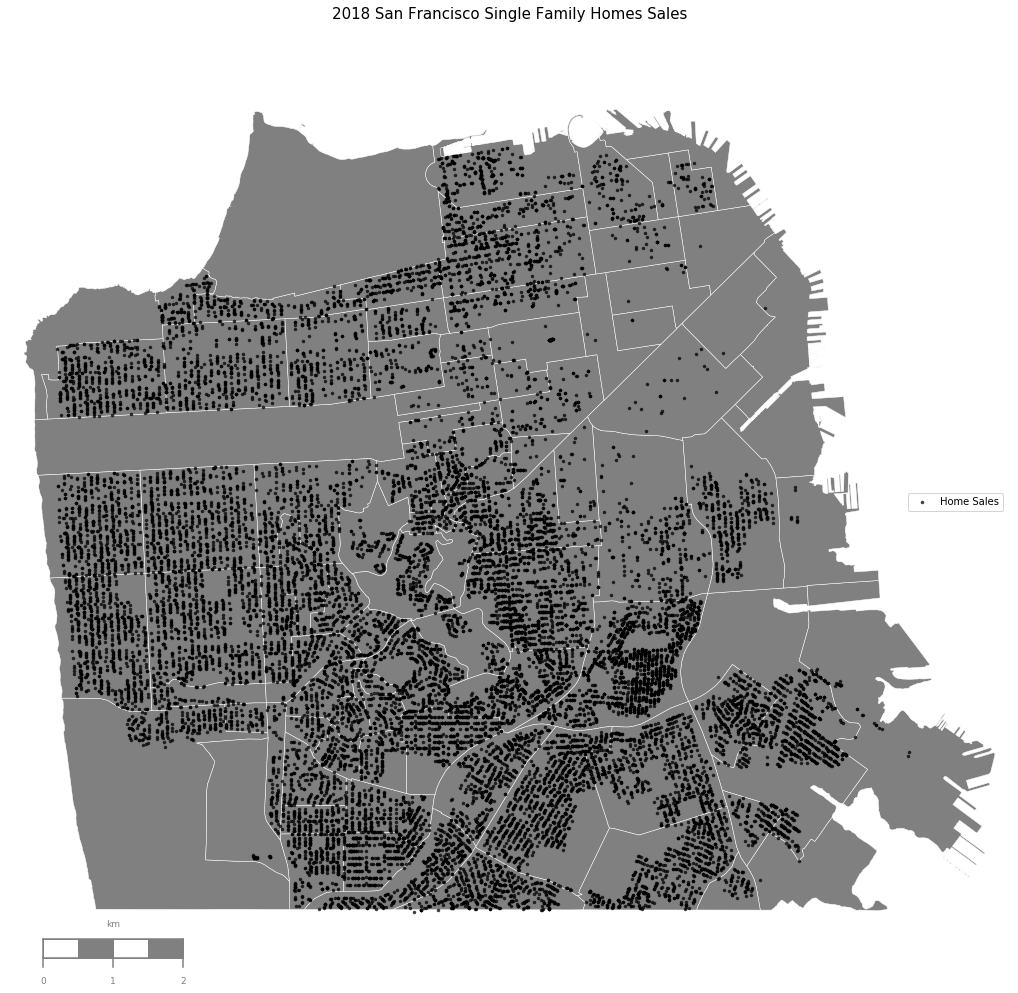

In [0]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)

dev = m.scatter(
    [geom.x for geom in map_points],
    [geom.y for geom in map_points],
    10, marker='o', lw=.25,
    facecolor='black', edgecolor='black',
    alpha=0.75, antialiased=True,
    label='Home Sales', zorder=3)

ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))

m.drawmapscale(
    coords[0] + 0.015, coords[1] - 0.005,
    coords[0], coords[1],
    2.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#808080',
    fontcolor='#808080',
    zorder=5)

plt.tight_layout()
plt.legend(loc="center right")
plt.title("2018 San Francisco Single Family Homes Sales", size=15)
fig.set_size_inches(15,15)
plt.show()

In [0]:
# Install pysal
!pip install -U pysal

Requirement already up-to-date: pysal in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
!apt-get install -qq curl g++ make

In [0]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  4059k      0 --:--:-- --:--:-- --:--:-- 4059k


In [0]:
import os
os.chdir('spatialindex-src-1.8.5')

In [0]:
!./configure

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for a sed that does not truncate output... /bin/sed
checking fo

In [0]:
!make

Making all in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
depbase=`echo Buffer.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ../../libtool  --tag=CXX   --mode=compile g++ -DPACKAGE_NAME=\"spatialindex\" -DPACKAGE_TARNAME=\"spatialindex-src\" -DPACKAGE_VERSION=\"1.8.5\" -DPACKAGE_STRING=\"spatialindex\ 1.8.5\" -DPACKAGE_BUGREPORT=\"mhadji@gmail.com\" -DPACKAGE_URL=\"\" -DSTDC_HEADERS=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_STDLIB_H=1 -DHAVE_STRING_H=1 -DHAVE_MEMORY_H=1 -DHAVE_STRINGS_H=1 -DHAVE_INTTYPES_H=1 -DHAVE_STDINT_H=1 -DHAVE_UNISTD_H=1 -DHAVE_DLFCN_H=1 -DLT_OBJDIR=\".libs/\" -DPACKAGE=\"spatialindex-src\" -DVERSION=\"1.8.5\" -DHAVE_FCNTL_H=1 -DHAVE_UNISTD_H=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_PTHREAD_H=1 -DHAVE_SYS_RESOURCE_H=1 -DHAVE_SYS_TIME_H=1 -DHAVE_STDINT_H=1 -DHAVE

In [0]:
!make install

Making install in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
mak

In [0]:
!pip install rtree

In [0]:
!ldconfig

In [0]:
from pysal.viz.mapclassify import Natural_Breaks as nb

# Calculate Jenks natural breaks for price_sf
breaks = nb(
    df_map[df_map['price_sf'].notnull()].price_sf.values,
    initial=300,
    k=10)

prev = 0
for pricesf, counts in zip(breaks.bins, breaks.counts):
    print(counts, prev, pricesf)
    prev = pricesf

/usr/local/lib/python3.6/dist-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Natural_Breaks is being renamed to NaturalBreaks. Natural_Breaks will be removed on 2020-01-31.
  warn(self.message)


6 0 1.0
6 1.0 419.7386221408466
11 419.7386221408466 593.0405364711473
25 593.0405364711473 773.7343886857194
16 773.7343886857194 945.7528010211317
9 945.7528010211317 1114.7560226189262
10 1114.7560226189262 1323.6376160068114
10 1323.6376160068114 1490.032184778493
5 1490.032184778493 1845.179717229425
2 1845.179717229425 2075.6825095301047


In [0]:
# the notnull method lets us match indices when joining
jb = pd.DataFrame({'jenks_bins': breaks.yb}, index=df_map[df_map['price_sf'].notnull()].index)
df_map.drop("jenks_bins", inplace=True, axis=1, errors="ignore")
df_map = df_map.join(jb)
df_map.jenks_bins.fillna(-1, inplace=True)

# assign labels to the colorbar based on the natural breaks bins
jenks_labels = ["<= %0.1f crimes / km$^2$" % b for b in breaks.bins]
jenks_labels.insert(0, 'No crimes')

<Figure size 432x288 with 0 Axes>

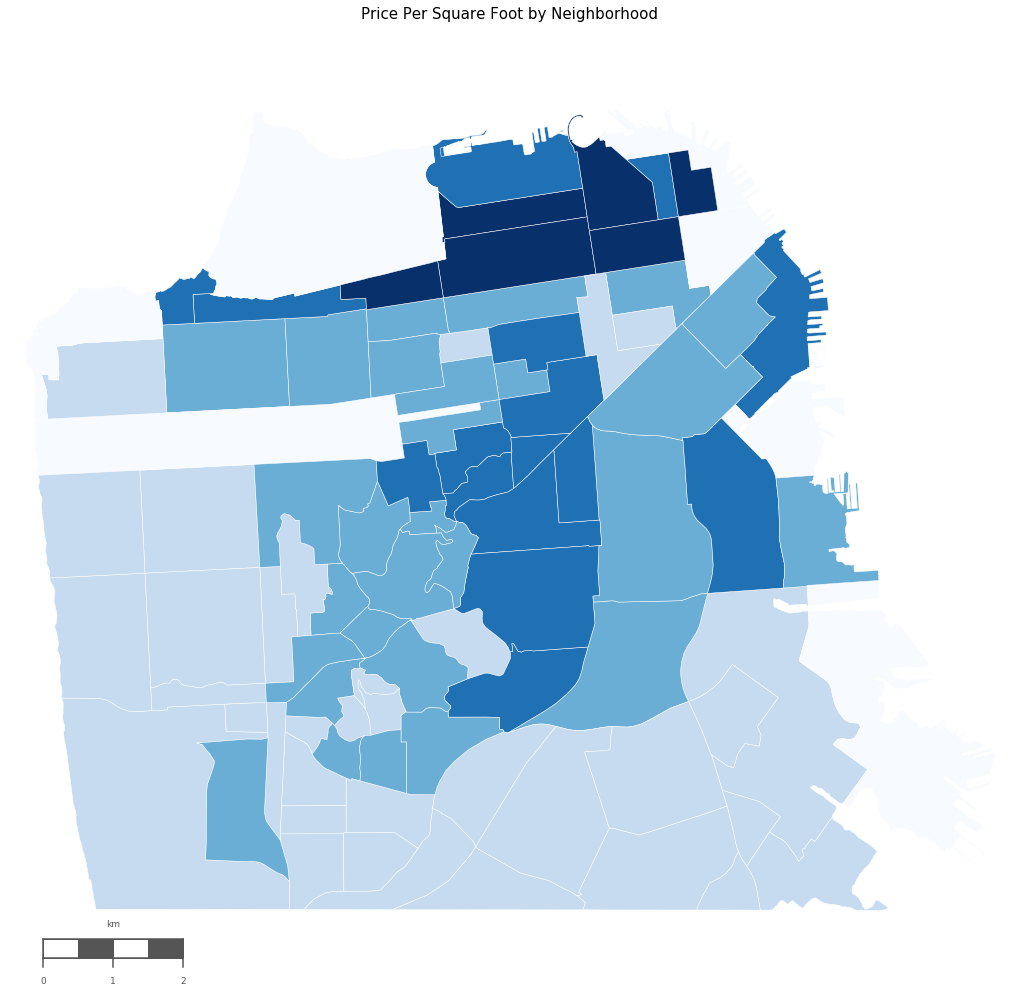

In [0]:
from matplotlib.colors import Normalize, LinearSegmentedColormap 

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)

# use a blue colour ramp - we'll be converting it to a map using cmap()
cmap = plt.get_cmap('Blues')
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['jenks_bins'].values)))
ax.add_collection(pc)

# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N + 1)]
    return LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

# Add a colour bar
#colorbar #_index(ncolors=len(jenks_labels), cmap=cmap, shrink=0.5, labels=jenks_labels)
#colorbar.ax.tick_params(labelsize=10)

# Show highest densities, in descending order
#highest = '\n'.join(
#    value[1] for _, value in df_map[(df_map['jenks_bins'] == 4)][:10].sort().iterrows())
#highest = 'Most criminal neighborhoods:\n\n' + highest
#highest = 'Most criminal neighborhoods:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
#details = cb.ax.text(
#    -1., 0 + 0.3,
#    highest,
#    ha='right', va='bottom',
#    size=10,
#    color='#555555')

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.015, coords[1] - 0.005,
    coords[0], coords[1],
    2.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.tight_layout()
plt.title("Price Per Square Foot by Neighborhood", size=15)
fig.set_size_inches(15, 15)
plt.show()